In [3]:
import numpy as np
import pandas as pd
import csv
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize
%matplotlib inline

Set locations

In [4]:
DATA_LOCATION = '../data/'
TEST_IMAGES_LOCATION = '../data/test_images/'
TRAIN_IMAGES_LOCATION = '../data/train_images/'

# Import data

### Label mapping

In [5]:
label_map = pd.read_csv(DATA_LOCATION + 'label_map.txt', sep=' ', names=['class_name','class_nr'])

In [6]:
label_map.sample(n=10)

,class_name,class_nr
28,tunicate_salp,28
6,echinoderm_larva_seastar_bipinnaria,6
82,siphonophore_other_parts,82
75,tunicate_salp_chains,75
76,appendicularian_straight,76
114,hydromedusae_partial_dark,114
100,chaetognath_sagitta,100
7,acantharia_protist_halo,7
102,fish_larvae_leptocephali,102
3,copepod_cyclopoid_oithona,3


### Sample data

In [7]:
sample = pd.read_csv(DATA_LOCATION + 'sample.csv', names=['image','class_nr'], header=0)

In [8]:
sample.sample(n=10)

,image,class_nr
1484,57453.jpg,0
2461,100494.jpg,0
2485,94975.jpg,0
2513,34194.jpg,0
126,82299.jpg,0
1457,159617.jpg,0
3684,104032.jpg,0
4934,34111.jpg,0
1969,131993.jpg,0
1774,80031.jpg,0


### Train data

In [9]:
train_labels = pd.read_csv(DATA_LOCATION + 'train_onelabel.csv')

In [10]:
train_labels.sample(n=10)

,image,class
7812,59940.jpg,34
20487,32433.jpg,101
21295,38529.jpg,104
6287,49234.jpg,27
5048,111604.jpg,22
18346,138047.jpg,89
17070,56443.jpg,84
2608,123857.jpg,11
19701,111605.jpg,100
991,67238.jpg,3


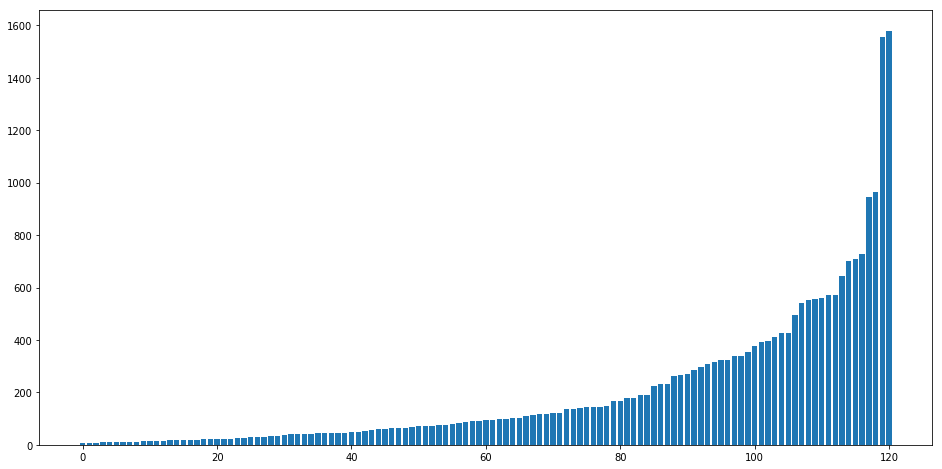

In [11]:
counts = train_labels.groupby('class').count().astype('int').sort_values('image')['image'].values.tolist()
plt.figure(figsize=(16,8))
plt.bar(range(len(counts)), counts)
plt.show()

In [12]:
counts[-1]

1580

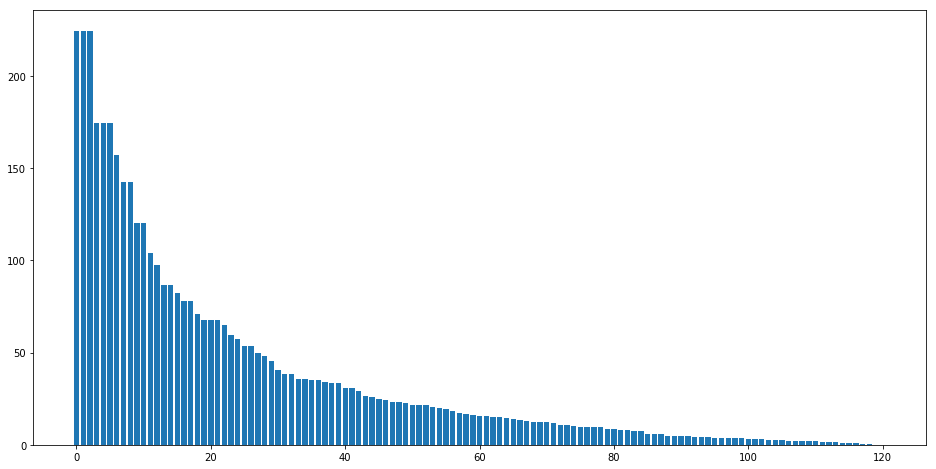

In [13]:
# the number of times the images in a class need to be added in order to balance items per class
times = []
for count in counts:
    times.append((1580 - count)/count)
plt.figure(figsize=(16,8))
plt.bar(range(len(times)), times)
plt.show()

In [30]:
with open(DATA_LOCATION + 'train_onelabel.csv', mode='r') as infile:
    reader = csv.reader(infile)
    class_counts = {}
    for row in reader:
        if(row[1] != 'class'):
            class_counts[int(row[1])] = class_counts.get(int(row[1]), 0) + 1
    # mean == 200
    mean = int(sum(class_counts.values()) / len(class_counts))
    max_nr = max(class_counts.values())
    for key, value in class_counts.items():
        class_counts[key] = int(class_counts[key] + (max_nr - class_counts[key])/3)

print(sum(class_counts.values()))

79829


## The actual images

Show a random image from the training set

In [ ]:
def get_image(filepath):
    """
    Load image from filepath to a numpy.ndarray
    input:
        - filepath: string with relative or absolute path to image
    output:
        - img:
            numpy.ndarray containing the image
            shaped (M,N), values [0.0, 1.0]
    """
    try:
        img = TRAIN_IMAGES_LOCATION + filepath
        img = mpimg.imread(img)
    except:
        img = filepath
        img = mpimg.imread(img)
    img = np.absolute(np.divide(img.astype(float), 255) - 1.0)
    return img

def show_image(filepath):
    """
    Show the image through Matplotlib
    input:
        - filepath: string with relative or absolute path to image
    output:
        - None
    """
    img = get_image(filepath)
    plt.imshow(img,cmap='binary')

In [ ]:
# show a random image from the train set
show_image(train_labels.sample(n=1).iloc[0]['image'])

## Making images square and resizing to consistent shape

In [ ]:
def get_padding(i):
    """
    Helper function for getting right padding sizes
    input:
        - i: positive integer gotten from substracting height and width of an image
    output:
        - Tuple representing the correct padding
    """
    if i%2 == 0:
        return (int(i/2),int(i/2))
    else:
        return (int(i/2-.5), int(i/2+.5))

    
def pad_image(image_path):
    """
    Add padding to image to make it square
    input:
        - image_path: string path of image
    output:
        - padded array of shape (N,N)
    """
    H, W = get_image(image_path).shape
    array = get_image(image_path)
    if H == W:
        return array
    elif H > W:
        return np.pad(array, ((0,0), get_padding(H-W)), 'constant')
    else:
        return np.pad(array, (get_padding(W-H), (0,0)), 'constant')
    
def resize_image(img, size):
    """
    Resize image to new square shape
    input:
        - img: numpy array representing image
        - size: final shape of image in pixels (integer)"""
    return resize(img, (size,size), mode='reflect')

In [ ]:
# Small sample
squares = [pad_image(TRAIN_IMAGES_LOCATION+train_labels.iloc[i]['image']) for i in range(100)]

In [ ]:
def show(array):
    plt.imshow(array,cmap='binary')

In [ ]:
show(resize_image(squares[11], 40))

In [ ]:
show(squares[11])